## cifar10 MNIST Classification 문제

### 텐서플로와 다른 라이브러리 임포트

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [22]:
# 런타임에서 할당하는데 필요한 양만큼의 GPU 메모리를 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Cifar 10데이터셋 임포트하기

load_data() 함수를 호출해서 Fashion MNIST 로딩 : 네 개의 넘파이(NumPy) 배열이 반환

In [23]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [24]:
train_images.shape

(50000, 32, 32, 3)

In [37]:
class_names = [
"airplane", "automobile", "bird",
"cat",
"deer", "dog", "frog", "horse", "ship", "truck"
]

### 데이터 탐색

In [26]:
train_images.shape

(50000, 32, 32, 3)

In [27]:
len(train_labels)

50000

In [28]:
train_labels.shape

(50000, 1)

In [29]:
train_labels = train_labels.flatten() 
test_labels = test_labels.flatten()

In [30]:
len(test_labels)

10000

### 데이터 전처리

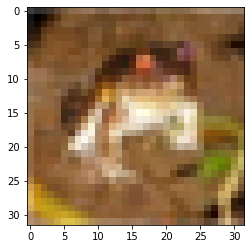

In [33]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

픽셀 값을 [0,255]에서 [0,1]로 조정

In [34]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Traning Set 25개 이미지, 클래스 이름 출력

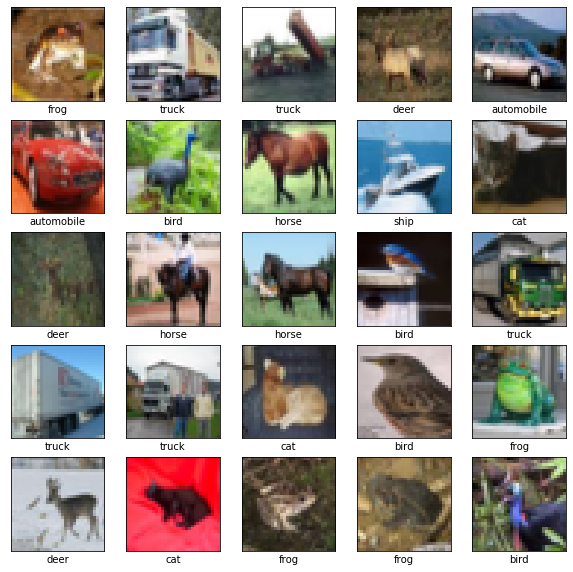

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성

#### Q. keras.layers.Conv2D, MaxPooling2D, Flatten, Dense를 사용해서 모델의 Layer를 구성하시오.
단, 각 계층의 activation은 relu로 구성

In [42]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),padding="SAME",activation ='relu',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),padding="SAME",activation ='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),padding="SAME",activation ='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

### 모델 훈련

In [45]:
batch_size = 64

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 109us/sample - loss: 1.2896 - accuracy: 0.5442
Epoch 2/5
50000/50000 [==============================] - 3s 65us/sample - loss: 0.9084 - accuracy: 0.6811
Epoch 3/5
50000/50000 [==============================] - 3s 65us/sample - loss: 0.7558 - accuracy: 0.7341
Epoch 4/5
50000/50000 [==============================] - 3s 65us/sample - loss: 0.6484 - accuracy: 0.7707
Epoch 5/5
50000/50000 [==============================] - 3s 65us/sample - loss: 0.5665 - accuracy: 0.8018


### 테스트 성능 측정 (정확도)

In [46]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.8930 - accuracy: 0.7078

테스트 정확도: 0.7078


### 예측 만들기

In [47]:
predictions = model.predict(test_images)

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

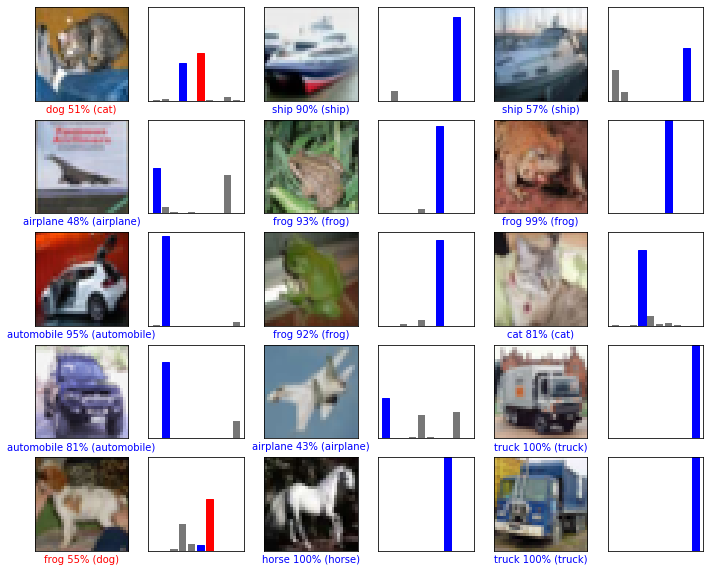

In [53]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Model Change

In [54]:
model = keras.Sequential([
      keras.layers.Conv2D(32, 3, padding="SAME", activation='relu', input_shape=(32,32,3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, 3, padding="SAME", activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(64, 3, padding="SAME", activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, 3, padding="SAME", activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(64, 3, padding="SAME", activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, 3, padding="SAME", activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
batch_size = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          validation_split = 0.1,
          epochs=30,
          callbacks=[early_stop])

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 7s 145us/sample - loss: 1.2717 - accuracy: 0.5492 - val_loss: 1.0274 - val_accuracy: 0.6424
Epoch 2/30
45000/45000 [==============================] - 5s 118us/sample - loss: 0.8233 - accuracy: 0.7094 - val_loss: 0.8781 - val_accuracy: 0.7026
Epoch 3/30
45000/45000 [==============================] - 5s 118us/sample - loss: 0.6505 - accuracy: 0.7713 - val_loss: 0.7423 - val_accuracy: 0.7474
Epoch 4/30
45000/45000 [==============================] - 5s 119us/sample - loss: 0.5355 - accuracy: 0.8108 - val_loss: 0.6544 - val_accuracy: 0.7798
Epoch 5/30
45000/45000 [==============================] - 5s 119us/sample - loss: 0.4494 - accuracy: 0.8420 - val_loss: 0.6915 - val_accuracy: 0.7798
Epoch 6/30
45000/45000 [==============================] - 5s 119us/sample - loss: 0.3684 - accuracy: 0.8705 - val_loss: 0.6441 - val_accuracy: 0.7888
Epoch 7/30
45000/45000 [===========================

NameError: name 'pd' is not defined

In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 1.1331 - accuracy: 0.7813

테스트 정확도: 0.7813


In [58]:
predictions = model.predict(test_images)

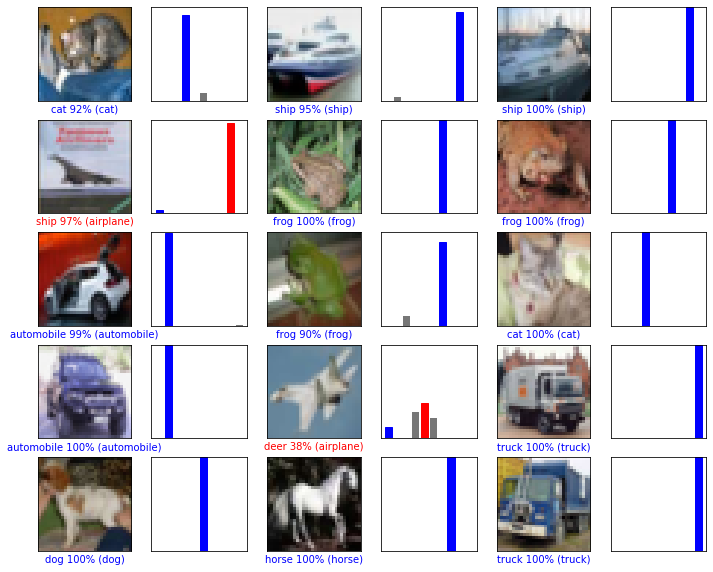

In [59]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()